In [5]:
import MatmaCore as mm

In [6]:
cp2k_test = mm.Mol('sample_data')
cp2k_test.cp2k(file='cp2k_traj.xyz', colvar=[0, 2], timestep=0.5)

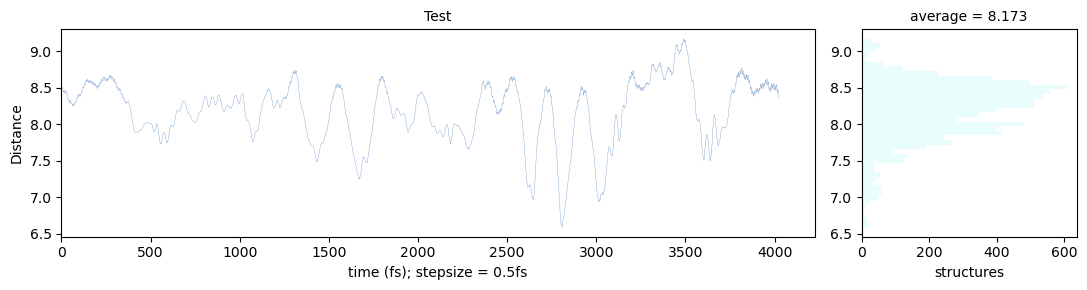

In [7]:
plot = mm.Plot()
plot.cmap(color_num=2,offset=0,map='ice')
plot.trajectory(cp2k_test, var_name='Distance', title='Test')

In [8]:
gromacs_test = mm.Mol('sample_data')
gromacs_test.gromacs(file='gromacs.xvg')

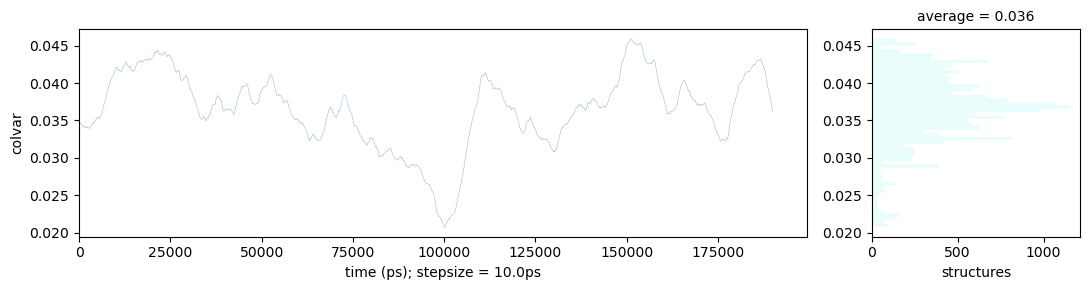

In [9]:
plot.trajectory(gromacs_test, average=1000)